In [1]:
%pylab inline
import transformation as trf
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [2]:
imshow_kwg = {'size': 5, 'aspect': 1, 'cmap': 'afmhot', 'add_colorbar': 0}

## Shared parameters for all test images

In [9]:
nx, ny = 65, 65
origin = trf.Point(32, 32)

# Example 1

## Test using a uniform intensity image 

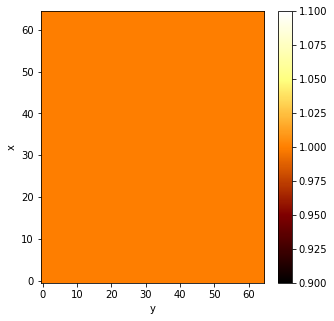

In [6]:
test_image1 = xr.DataArray(np.ones((ny, nx)), coords=[('x', range(nx)), ('y', range(ny))])
test_image1.plot.imshow(**{**imshow_kwg, 'add_colorbar': True})

## Make Cartesian-to-polar coordinate mapping

In [10]:
cart_to_polar_mapping = trf.cart_to_polar_map(test_image1.x, test_image1.y, origin)

## See how polar coordinates $(\theta, r)$ relate to Cartesian coordinates $(x, y)$ of the image.

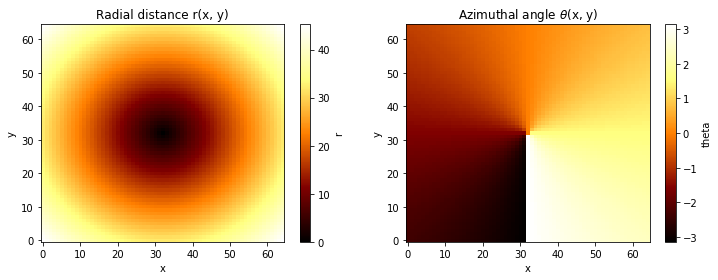

In [11]:
fig, ax = subplots(1, 2, figsize=(12, 4))
cart_to_polar_mapping.r.plot.imshow(ax=ax[0], cmap='afmhot')
ax[0].set_title('Radial distance r(x, y)')
cart_to_polar_mapping.theta.plot.imshow(ax=ax[1], cmap='afmhot')
ax[1].set_title(r'Azimuthal angle $\theta$(x, y)')

## Group image pixels into bins based on their polar coordinates $(\theta, r)$

In [34]:
bins = trf.make_bins(cart_to_polar_mapping, theta=linspace(-pi, pi, 5), r=arange(0, 47, 2.))

## Visualize binning. Each bin is a segment of an annulus.

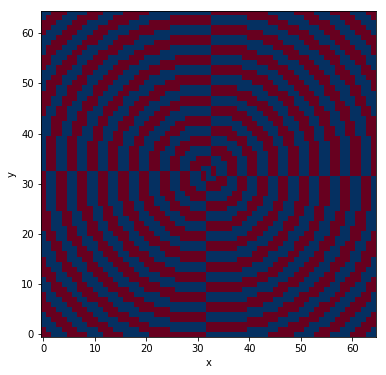

In [35]:
trf.plot_bins(bins)

## Transform image into polar coordinates by averaging all pixels in corresponding bins

In [36]:
polar_image1 = trf.transform_to_polar(test_image1, bins)

## Visualize the result of transformation

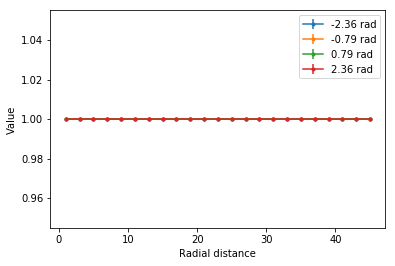

In [38]:
fig, ax = subplots()
for theta, radial_distrib in polar_image1.groupby('theta'):
    ax.errorbar(radial_distrib.r, radial_distrib.y, radial_distrib.yerr, label=f'{theta:.2f} rad', marker='.')
ax.legend()
ax.set_xlabel('Radial distance')
ax.set_ylabel('Value')

# Example 2

## Test using an image of a circle

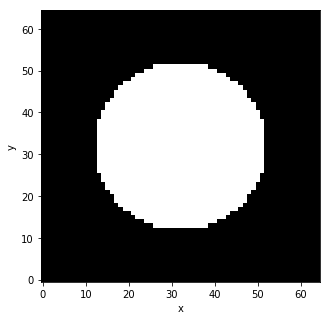

In [3]:
test_image2 = (trf.cart_to_polar_map(np.arange(nx), np.arange(ny), origin).r < 20.).astype(float)
test_image2.plot.imshow(**imshow_kwg)

## Add a bright spot at the upper right quadrant

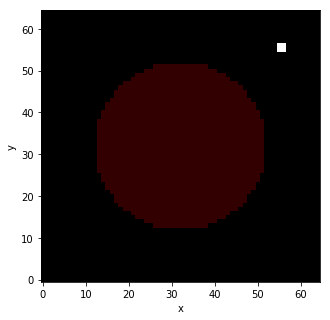

In [4]:
test_image[55:57, 55:57] = 10.
test_image.plot.imshow(**imshow_kwg)

## Group image pixels into bins based on their polar coordinates $(\theta, r)$

In [7]:
bins = trf.make_bins(cart_to_polar_mapping, theta=linspace(-pi, pi, 5), r=arange(0, 55, 5.))

## Visualize binning. Each bin is a segment of an annulus.

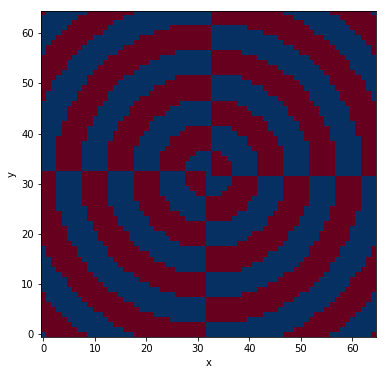

In [8]:
trf.plot_bins(bins)

## Transform image into polar coordinates by averaging all pixels in corresponding bins

In [9]:
polar_image = trf.transform_to_polar(test_image, bins)

## Visualize the result of transformation

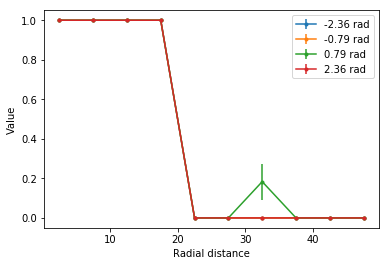

In [10]:
fig, ax = subplots()
for theta, radial_distrib in polar_image.groupby('theta'):
    ax.errorbar(radial_distrib.r, radial_distrib.y, radial_distrib.yerr, label=f'{theta:.2f} rad', marker='.')
ax.legend()
ax.set_xlabel('Radial distance')
ax.set_ylabel('Value')

## Green peak correspond to the segment of annulus with $\theta = 0.79$ rad.
## Using image above we can see that this is the upper right quadrant, where the bright spot is.